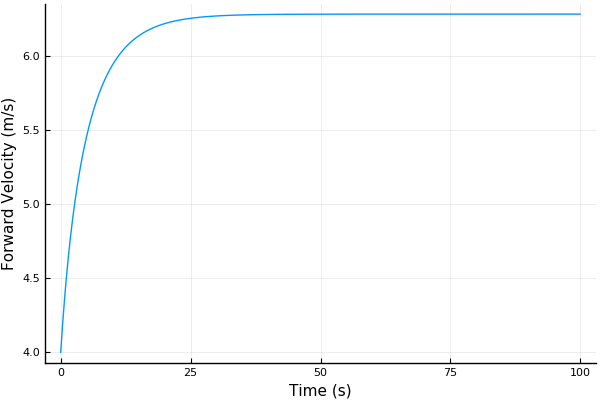

In [15]:
#simulation of bicycle velocity with linear and quadratic drag
using Plots
pyplot()
plt = plot()

t = Float64[0.0] 
v = Float64[4.0] #initial velocity of 4 m/s

P  = 400.0 #power of cyclist in W
F  = P/7.0 #inital force when starting from rest
m  = 70.0  #mass of cyclist in kg
h  = 1.5   #height of bicycle + rider in m
θ  = 5*(π/180) #angle of ascent
g  = 9.81  #acceleration due to gravity
C  = 0.5   #drag coefficient
A  = 0.33  #crossectional area of bike + rider in m^2
ρ  = 1.225 #density of air in kg/m^3
η  = 2e-5  #viscosity of air in Pa*s
Δt = 0.01   #timestep in seconds
N  = 10000 #number of timesteps

function v_next(v)
    P_ascent = v*m*g*sin(atan(θ))
    if F*v < P - P_ascent
        v + (F/m)*Δt
    else
        v + (((P - P_ascent)/(m*v)) - (η*A*v)/h - (C*ρ*A*v^2)/(2*m))*Δt
    end
end

for i = 0:N
    push!(t, t[end] + Δt)
    push!(v, v_next(v[end]))
end


plot!(plt, t, v, legend=:none)
xlabel!("Time (s)")
ylabel!("Forward Velocity (m/s)")



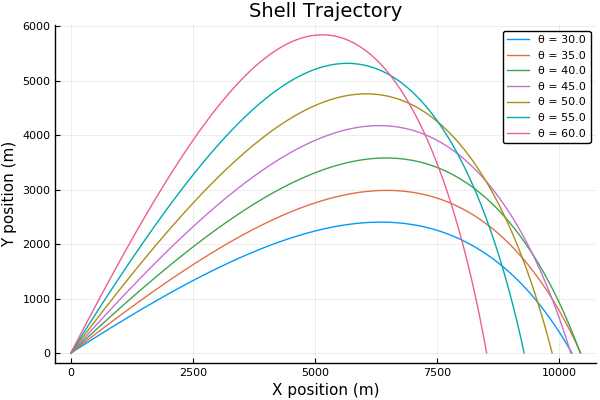

In [2]:
#simulation of firing a cannon shell
using Plots
pyplot()
plt = plot(title="Shell Trajectory")
xlabel!("X position (m)")
ylabel!("Y position (m)")

struct Point
    x::Float64
    y::Float64
end
Base.:(*)(p::Point, i::Float64) = Point(p.x*i, p.y*i)
Base.:(+)(p1::Point, p2::Point) = Point(p1.x + p2.x, p1.y + p2.y)

r = Point[]
v = Point[] 
v0 = 700.0 #initial velocity in m/s
m  = 0.5 #mass of shell in kg
G  = 3.986e14 #gravitational constant * mass of earth
R  = 6.3781e6 #radius of earth
ρ0 = 1.225 # density of air at sea level
Δt = 0.01  #timestep in s

for θ = 30.0:5.0:60.0
    push!(r, Point(0.0,0.0))
    push!(v, Point(v0*cos(θ*(π/180)), v0*sin(θ*(π/180))))
    ρ = ρ0
    
    while r[end].y >= 0.0
        #drag force
        B = (ρ/ρ0) * 4e-5
        v_tot = sqrt(v[end].x^2 + v[end].y^2)
        drag_x = -(B/m)*v[end].x*v_tot
        drag_y = -(B/m)*v[end].y*v_tot
        g = G / R^2
        push!(r, r[end] + v[end]*Δt)
        push!(v, Point(v[end].x + (drag_x/m)*Δt, v[end].y + (-g + drag_y/m)*Δt))
        
        #recalculate air density for current altitude using adiabatic approx.
        #ρ = ρ0(1 - ay/T0)^α
        ρ = ρ0*(1 - (6.5e-3 *r[end].y)/300)^2.5
    end
    
    #linear interpolation between last 2 ys to find x of impact
    last = pop!(r)
    s = -(r[end].y/last.y)
    x_last = (r[end].x + s*last.x)/(s + 1)
    push!(r, Point(x_last, 0.0))
    
    plot!(plt, map(p->p.x, r), map(p->p.y, r), label="θ = $θ")
    
    r = Point[]
    v = Point[]
end

plt